In [1]:
#Dataframe
import yaml
import pandas as pd
import numpy as np

pd.options.display.max_seq_items = 3000000
#Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from ipywidgets import interact, interact_manual

#Cleaning 
import re

# Encoding
from sklearn.feature_extraction import FeatureHasher

In [2]:
def read_config(file_path='./config.yaml'):
    """Reads configuration file
    Args:
        file_path (str, optional): file path
    Returns:
        dict: Parsed configuration file
    """
    with open(file_path, "r") as f:
        return yaml.safe_load(f)

def get_data(file_path=None, nrows=None):
    """Loads data
    Args:
        file_path (str, optional): file path of dataset
            By default load data set from static web page
        nrows (int, optional): number or rows to loads from dataset
            By default loads all dataset  
    Returns:
        dataframe: output dataframe
    """
    if file_path is None:
        cfg = read_config()
        file_path = cfg['paths']['eng_dataset']
    print("Reading dataset ...")    
    return pd.read_csv(file_path,sep="\t", encoding="utf-8",
                       nrows=nrows, low_memory=False)

if __name__ == "__main__":
    data = get_data(file_path = "../data/datas_reste_non_num_a_traiter2.csv")
    print(f"data set shape is {data.shape}")

Reading dataset ...
data set shape is (1833614, 166)


In [3]:
data.describe()

,serving_quantity,additives_n,nutriscore_score,nova_group,ecoscore_score,product_quantity,unique_scans_n,completeness,energy-kj_100g,energy-kcal_100g,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,fruits-vegetables-rate_100g
count,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,...,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06,1.833614e+06
mean,7.430692e+01,1.340286e+00,9.534799e+00,3.711068e+00,6.324222e+01,3.181495e+02,1.543422e+00,4.804712e-01,9.978601e+02,2.642582e+02,...,9.534805e+00,1.784640e+01,5.498415e+01,1.475000e+00,8.718584e-02,5.303330e-02,1.498661e+00,2.798331e-02,1.153875e-02,3.727416e+01
std,7.368687e+01,1.719154e+00,5.743108e+00,7.270904e-01,1.675437e+01,5.108782e+02,4.059897e+00,2.015523e-01,4.692459e+02,1.811809e+02,...,5.743114e+00,8.627933e-01,1.117650e+01,1.998402e-15,1.760728e-01,7.895907e-01,1.229625e+00,5.555057e-02,3.637514e-03,9.737979e+00
min,0.000000e+00,0.000000e+00,-1.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e-01,0.000000e+00,0.000000e+00,...,-1.500000e+01,1.300000e+01,1.400000e+01,1.475000e+00,0.000000e+00,0.000000e+00,4.000000e-01,1.600000e-03,8.000000e-04,2.500000e+01
25%,5.600000e+01,1.000000e+00,1.000000e+01,4.000000e+00,6.300000e+01,2.500000e+02,1.000000e+00,3.000000e-01,9.570000e+02,1.020000e+02,...,1.000000e+01,1.800000e+01,5.935000e+01,1.475000e+00,7.350000e-02,1.700000e-05,1.200000e+00,2.800000e-02,1.100000e-02,2.500000e+01
50%,5.700000e+01,1.000000e+00,1.000000e+01,4.000000e+00,7.100000e+01,2.500000e+02,1.000000e+00,4.000000e-01,9.570000e+02,2.589286e+02,...,1.000000e+01,1.800000e+01,5.935000e+01,1.475000e+00,7.350000e-02,5.560000e-05,1.200000e+00,2.800000e-02,1.100000e-02,4.500000e+01
75%,5.700000e+01,1.000000e+00,1.000000e+01,4.000000e+00,7.100000e+01,2.800000e+02,1.000000e+00,5.750000e-01,9.570000e+02,3.910000e+02,...,1.000000e+01,1.800000e+01,5.935000e+01,1.475000e+00,7.350000e-02,5.560000e-05,1.200000e+00,2.800000e-02,1.100000e-02,4.500000e+01
max,5.000000e+03,1.500000e+01,4.000000e+01,4.000000e+00,1.250000e+02,8.000000e+04,8.420000e+02,1.100000e+00,3.700000e+03,9.000000e+02,...,4.000000e+01,1.800000e+01,7.000000e+01,1.475000e+00,4.550000e+00,5.160000e+01,2.000000e+01,7.500000e+01,5.720000e-01,4.500000e+01


# Data Cleaning

## Function

In [4]:
def add_feature_hashed_column(df, column_name, n_features=1000):
    """
    Add a feature hashed column to a DataFrame based on a specified column.
    
    Args:
    df (pandas.DataFrame): The DataFrame to add the feature hashed column to.
    column_name (str): The name of the column to hash.
    n_features (int): The number of features to use for the hash. Default is 1000.
    
    Returns:
    pandas.DataFrame: The original DataFrame with a new column containing the feature hashed values.
    """
    # Create the hasher object
    hasher = FeatureHasher(n_features=n_features, input_type='string')
    
    # Hash the column
    hashed_column = hasher.transform(df[column_name].apply(lambda x: [x]))
    
    # Create a DataFrame from the hashed column
    hashed_df = pd.DataFrame(hashed_column.toarray())
    
    # Rename the columns of the hashed DataFrame
    hashed_df.columns = [column_name + '_' + str(i) for i in range(n_features)]
    
    # Concatenate the hashed DataFrame to the original DataFrame
    df = pd.concat([df, hashed_df], axis=1)
    
    # Return the DataFrame with the new hashed column
    return df


In [5]:


# Filtering out non relevant columns

li_col_del = list(data.columns[data.columns.str.contains('image')]) +\
            list(data.columns[data.columns.str.contains('tags')]) +\
             list(data.columns[data.columns.str.contains('states')])

data.drop(columns=li_col_del, inplace=True)

print(data.shape)



(1833614, 157)


In [6]:
## Changing format of object and float64 columns

new_dtypes = {}

# object -> category (if nb unique < half total nb of rows and not XXX_100g)
for col in data.columns.values:
    if data[col].dtype == 'object' :
      if len(data[col].unique()) / len(data[col]) < 0.5:
        new_dtypes[col] = 'category'
      else:
        new_dtypes[col] = 'object'

# float64 -> float32
for col in data.columns.values:
    if data[col].dtype == 'float64':
      if data[col].notna().sum()!=0: # 1% sample columns happening to be all null 
        new_dtypes[col] = 'float32'

# int64 -> int8
for col in data.columns.values:
    if data[col].dtype == 'int64':
        new_dtypes[col] = 'int8'
        
print(new_dtypes)

{'code': 'object', 'url': 'object', 'product_name': 'object', 'abbreviated_product_name': 'category', 'generic_name': 'category', 'quantity': 'category', 'packaging_en': 'category', 'packaging_text': 'category', 'brands': 'category', 'categories_en': 'category', 'origins_en': 'category', 'manufacturing_places': 'category', 'labels_en': 'category', 'emb_codes': 'category', 'first_packaging_code_geo': 'category', 'purchase_places': 'category', 'stores': 'category', 'countries_en': 'category', 'ingredients_text': 'category', 'allergens': 'category', 'traces_en': 'category', 'serving_size': 'category', 'no_nutrition_data': 'category', 'additives_en': 'category', 'nutriscore_grade': 'category', 'pnns_groups_1': 'category', 'pnns_groups_2': 'category', 'food_groups_en': 'category', 'brand_owner': 'category', 'ecoscore_grade': 'category', 'owner': 'category', 'main_category_en': 'category', 'serving_quantity': 'float32', 'additives_n': 'float32', 'nutriscore_score': 'float32', 'nova_group': '

In [7]:
## Forcing XXX_100g and nutriscore columns to 'float32' and nova to 'object'

X_100g_cols = data.columns[data.columns.str.contains('_100g')]
for col in X_100g_cols:
    new_dtypes[col] = 'float32'

In [8]:
desc = data.describe(include='all')

In [9]:
# Checking columns in df

for i, c in enumerate(data.columns):
    print('\n'+c if i % 6 == 0 else c, end=' | ')


code | url | product_name | abbreviated_product_name | generic_name | quantity | 
packaging_en | packaging_text | brands | categories_en | origins_en | manufacturing_places | 
labels_en | emb_codes | first_packaging_code_geo | purchase_places | stores | countries_en | 
ingredients_text | allergens | traces_en | serving_size | serving_quantity | no_nutrition_data | 
additives_n | additives_en | nutriscore_score | nutriscore_grade | nova_group | pnns_groups_1 | 
pnns_groups_2 | food_groups_en | brand_owner | ecoscore_score | ecoscore_grade | product_quantity | 
owner | unique_scans_n | completeness | main_category_en | energy-kj_100g | energy-kcal_100g | 
energy_100g | energy-from-fat_100g | fat_100g | saturated-fat_100g | butyric-acid_100g | caproic-acid_100g | 
caprylic-acid_100g | capric-acid_100g | lauric-acid_100g | myristic-acid_100g | palmitic-acid_100g | stearic-acid_100g | 
arachidic-acid_100g | behenic-acid_100g | lignoceric-acid_100g | cerotic-acid_100g | montanic-acid_100g |

## Features Selection

1.1 Empty Columns 

In [10]:


# Checking nb of not null values in the columns

nb_not_null = pd.DataFrame((~data.isna()).sum(axis =0), columns=['nb'])
nb_not_null.sort_values(by=['nb'], axis=0, ascending=True, inplace=True)
nb_not_null.T.head(150)



,abbreviated_product_name,packaging_text,no_nutrition_data,owner,first_packaging_code_geo,origins_en,emb_codes,generic_name,traces_en,manufacturing_places,...,eicosapentaenoic-acid_100g,alpha-linolenic-acid_100g,omega-3-fat_100g,polyunsaturated-fat_100g,monounsaturated-fat_100g,unsaturated-fat_100g,melissic-acid_100g,montanic-acid_100g,omega-9-fat_100g,fruits-vegetables-rate_100g
nb,8470,17632,34485,40444,60638,92628,115189,121580,137328,142754,...,1833614,1833614,1833614,1833614,1833614,1833614,1833614,1833614,1833614,1833614


In [11]:
# Displaying a table with bins
mask = pd.cut(nb_not_null['nb'], [-1,0,5,10,100,300,10000,2000000]) # 
mask.value_counts(normalize=False, sort=False)



nb
(-1, 0]               0
(0, 5]                0
(5, 10]               0
(10, 100]             0
(100, 300]            0
(300, 10000]          1
(10000, 2000000]    156
Name: count, dtype: int64

In [12]:
# Changing the name of some of the columns

data.rename(columns={'nutriscore_score': 'nutriscore',
                   'nutriscore_grade': 'nutrigrade',
                    'traces_en' : 'traces',
                     'labels_en' : 'labels',
                   'pnns_groups_1': 'pnns1',
                   'pnns_groups_2': 'pnns2',
                   'nutrition_score_fr_100g':'nutriscore_fr'},
          inplace=True)



In [13]:
# Changing the name of some of the columns

data.rename(columns={'countries_en': 'countries',
                     'packaging_en' : 'packaging',
                   'additives_en': 'additives',
                   'main_category_en': 'main_category',
                   'categories_en': 'categories',
                   'nutrition_score_fr_100g':'nutriscore_fr'},
          inplace=True)

## Redundancy of features 

In [14]:


# Comparing filled values in two columns
''' returns indices where both are filled, or first only, or second, or none'''

def comp_df (df, col1, col2, print_option):
  m_both = (~df[[col1,col2]].isna()).sum(axis=1)==2 # mask for both cells filled
  m_one = (~df[[col1,col2]].isna()).sum(axis=1)==1 # mask for only one cell filled
  m_col1 = m_one & ~df[col1].isna() # mask for only col1 cell filled
  m_col2 = m_one & ~df[col2].isna() # mask for only col2 cell filled
  mnone = ~m_one & ~m_both
  ind_both = df.index[m_both].to_list()
  ind_col1 = df.index[m_col1].to_list()
  ind_col2 = df.index[m_col2].to_list()
  ind_none = df.index[mnone].to_list()
  if print_option :
    print("nb rows both filled: ", len(ind_both))
    print("nb rows with only", col1, "filled: ", len(ind_col1))
    print("nb rows with only", col2, "filled: ", len(ind_col2))
    print("nb rows not filled: ", len(ind_none))
  else:
    pass
  return(ind_both, ind_col1, ind_col2, ind_none)



In [15]:


# Printing result of comparison in each case:

li_col = ['packaging']
for c in li_col:
  c1 = c
  c2 = c+'_text'
  print('COLUMN', c,':')
  t_ind = comp_df(data, c1, c2, True)
  data.loc[t_ind[1], [c1,c2]] = np.nan



COLUMN packaging :
nb rows both filled:  17632
nb rows with only packaging filled:  1815982
nb rows with only packaging_text filled:  0
nb rows not filled:  0


In [16]:
data.filter( like = 'packaging')

,packaging,packaging_text,first_packaging_code_geo
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1833609,NaN,NaN,NaN
1833610,NaN,NaN,NaN
1833611,NaN,NaN,NaN
1833612,NaN,NaN,NaN


In [17]:
data.filter(like = 'brands')

,brands
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1833609,thiriet
1833610,harrys
1833611,harrys
1833612,harrys


In [18]:
data.drop(columns = 'packaging_text',inplace = True)

In [19]:
# Checking the remaining columns

for i, c in enumerate(data.columns):
    print('\n'+c if i % 6 == 0 else c, end=' | ')


code | url | product_name | abbreviated_product_name | generic_name | quantity | 
packaging | brands | categories | origins_en | manufacturing_places | labels | 
emb_codes | first_packaging_code_geo | purchase_places | stores | countries | ingredients_text | 
allergens | traces | serving_size | serving_quantity | no_nutrition_data | additives_n | 
additives | nutriscore | nutrigrade | nova_group | pnns1 | pnns2 | 
food_groups_en | brand_owner | ecoscore_score | ecoscore_grade | product_quantity | owner | 
unique_scans_n | completeness | main_category | energy-kj_100g | energy-kcal_100g | energy_100g | 
energy-from-fat_100g | fat_100g | saturated-fat_100g | butyric-acid_100g | caproic-acid_100g | caprylic-acid_100g | 
capric-acid_100g | lauric-acid_100g | myristic-acid_100g | palmitic-acid_100g | stearic-acid_100g | arachidic-acid_100g | 
behenic-acid_100g | lignoceric-acid_100g | cerotic-acid_100g | montanic-acid_100g | melissic-acid_100g | unsaturated-fat_100g | 
monounsaturated-fat_

## Categorial Features

#### 2.0 Missing value

In [20]:

cols = ['brands', 'packaging', 'countries', 'labels', 'traces', 'additives',
        'allergens', 'main_category', 'categories','pnns2', 'pnns1']


FileNotFoundError: [Errno 2] No such file or directory: 'image/C_2_0_cat_nb_vs_freq_thr.png'

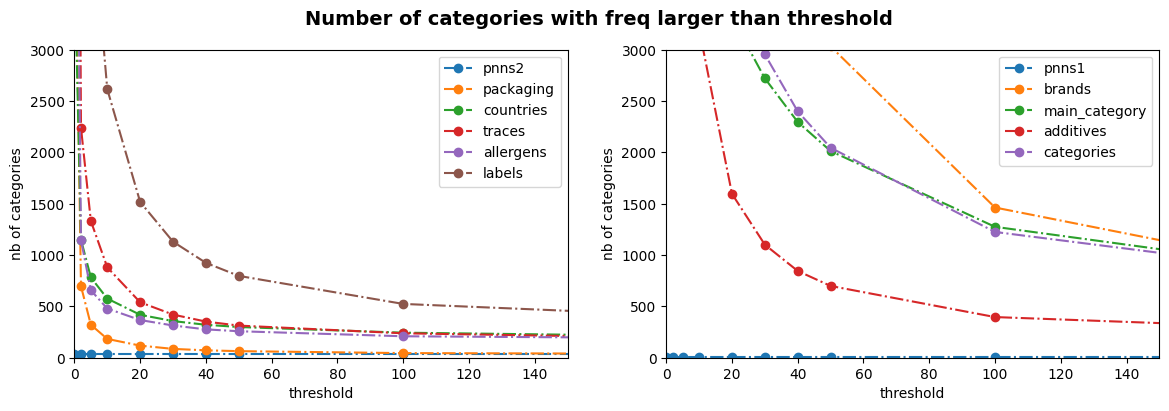

In [21]:
# Checking lower number of occurences in cat columns

fig, axs = plt.subplots(1,2)
thresh = [0,2,5,10,20,30,40,50,100,250,500,1000,5000]

for i, c in enumerate(['pnns2', 'packaging', 'countries',\
                      'traces',  'allergens', 'labels']):
    ser = data[c].value_counts()
    axs[0].plot(thresh, np.array([len(ser[ser>t]) for t in thresh])+(i*30),
             label=c, marker='o', ls='-.')
    
for i, c in enumerate(['pnns1', 'brands','main_category','additives',\
                      'categories']):
    ser = data[c].value_counts()
    axs[1].plot(thresh, np.array([len(ser[ser>t]) for t in thresh])+(i*30),
             label=c, marker='o', ls='-.')

[(ax.set_xlabel('threshold'),ax.set_ylabel('nb of categories')) for ax in axs];
[ax.set(xlim=(0,150), ylim=(0,3000)) for ax in axs];
[ax.legend() for ax in axs];

fig.suptitle('Number of categories with freq larger than threshold',
             fontweight='bold', fontsize=14)
plt.gcf().set_size_inches(14,4)
plt.savefig('image/C_2_0_cat_nb_vs_freq_thr.png', dpi=400);
plt.show()

In [24]:

def print_comp_info(col=li_col):
  c1 = col
  c2 = c1+'_tags'
  # Comparing content of 2 columns, print info and returns indexes 
  t_ind = comp_df(data, c1, c2, True)
  # Displaying a random sample of cells:
  '''- when col1 only is filled
  - when col2 only is filled
  - when both columns are filled'''
  display_side_by_side(df.loc[t_ind[1],[c1, c2]]\
                       .sample(5 if len(t_ind[1])>5 else len(t_ind[1])),
                      df.loc[t_ind[2], [c1, c2]]\
                       .sample(5 if len(t_ind[2])>5 else len(t_ind[2])),
                      df.loc[t_ind[0], [c1, c2]]\
                       .sample(5 if len(t_ind[0])>5 else len(t_ind[0])))



### 2.1 Features with list

In [25]:


# Replace - by ' ' in  columns
for c in cols:
    data[c] = data[c].replace([r'[-]'], [' '], regex=True)

In [26]:


# Printing columns containing lists or not

for c in cols:
    n_lists = data[c].str.contains(',').sum()
    if data[c].str.contains(',').sum():
        print(c.upper()+': ' + str(n_lists) + ' lists')
    else:
        print(c + ': - no list - ')



BRANDS: 121817 lists
PACKAGING: 9568 lists
COUNTRIES: 90039 lists
LABELS: 324248 lists
TRACES: 91907 lists
ADDITIVES: 301649 lists
ALLERGENS: 84626 lists
main_category: - no list - 
CATEGORIES: 795255 lists
pnns2: - no list - 
pnns1: - no list - 


In [27]:


# Splitting categories in 2 groups: containing lists, or not

multi_cat_cols = ['brands', 'packaging', 'countries','labels',
                  'traces','additives','allergens','categories']

cat_cols = ['main_category', 'pnns1', 'pnns2']




### Splitting, extracting main, dropping less frequent values

categories with lists

In [28]:


# Setting to nan categories with less than freq 15 | returning tuples for others  

def filter_main_categories(ser,n):
    ser_m = ser
    flat_values = pd.Series([item for sublist in ser.str.split(',')\
                            for item in sublist])
    cat_occ = flat_values.value_counts()
    to_keep = cat_occ[cat_occ>n].index
    ser_m = ser_m.apply(lambda x: tuple([s.strip() for s in x.split(',')\
                                            if s.strip() in to_keep]))
    return ser_m



categories without lists

In [29]:
n = 15

In [30]:


# Printing number of unique values of category columns

print('Number of categories: ',[(cat+' ('+str(data[cat].nunique())+') ') for cat in cols])



Number of categories:  ['brands (163465) ', 'packaging (4825) ', 'countries (3848) ', 'labels (72260) ', 'traces (14005) ', 'additives (100329) ', 'allergens (7598) ', 'main_category (33326) ', 'categories (86897) ', 'pnns2 (40) ', 'pnns1 (11) ']


FileNotFoundError: [Errno 2] No such file or directory: 'image/C_2_0_unknown_cat_values.png'

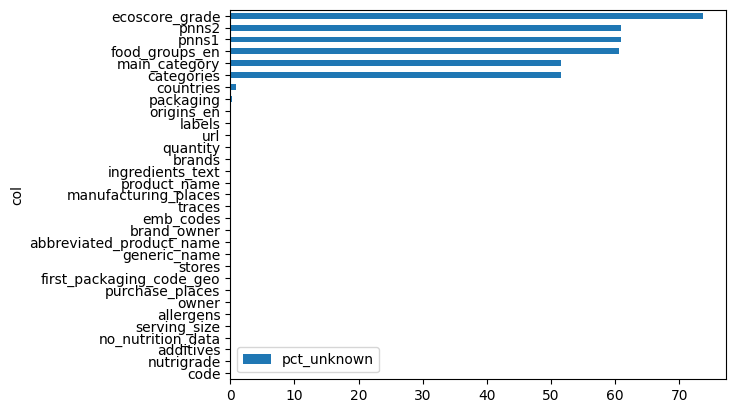

In [31]:
# Percentage of 'unknown' in categorical data

tot = data.shape[0]
ser = pd.DataFrame([[c, data[c].str.contains('unknown').sum()*100/tot] \
                 for c in data.select_dtypes('object').columns],
                 columns=['col', 'pct_unknown']).set_index('col')
ser.sort_values('pct_unknown').plot.barh()
plt.savefig('image/C_2_0_unknown_cat_values.png', dpi=400);
plt.show()


### 2.1 'product_name' column

In [33]:


# Replacing invalid names (1 or 0 characters) with np.NaN


data.loc[data[data['product_name'].str.len()<2].index,'product_name'] = np.nan


### 2.2 'quantity' column

In [34]:
# Changing the type of quantity column from 'category' to 'quantity'

data['quantity'] = data['quantity'].astype('object')

In [35]:
# Function selecting the most relevant tuple (num,unit) in the list
# by order of priority : unit in li_prio1, then in li_prio2

def sel_gr(li, li_prio1, li_prio2):
  res = 0
  nums, units = li
  tab_t_u = []
  ind = np.nan
  for i in units:
    if  i in li_prio1:
      tab_t_u.append(2)
    elif  i in li_prio2:
      tab_t_u.append(1)
    else:
      tab_t_u.append(0) if i!='' else tab_t_u.append(np.nan)
  i_tab1 = [i for i in range(len(tab_t_u)) if tab_t_u[i]==2] # indexes of all volumes (prio1)
  i_tab2 = [i for i in range(len(tab_t_u)) if tab_t_u[i]==1] # indexes of all masses (prio2)
  i_tab0 = [i for i in range(len(tab_t_u)) if tab_t_u[i]==0] # indexes of all others (prio3)
  if len(i_tab1)>0: # prio1 (vol)
    ind = i_tab1[np.argmax([nums[i] for i in i_tab1])]
  elif len(i_tab2)>0: # prio2 (mass)
    ind = i_tab2[np.argmax([nums[i] for i in i_tab2])]
  else:
    ind = i_tab0[np.argmax([nums[i] for i in i_tab0])] if len(i_tab0)>0 else np.nan
  return(nums[ind], units[ind]) if ind is not np.nan else (np.nan, np.nan)

In [36]:

# Creating a new database with 'quantity' data (wo null, same index)

df_q = data['quantity'].dropna().to_frame()
print("Nb of notna values in 'quantity': {} on {}, i.e. {:.1f}%"\
           .format(df_q.shape[0], data.shape[0],df_q.shape[0]*100/data.shape[0]))
display(df_q.head(15).T)



Nb of notna values in 'quantity': 552766 on 1833614, i.e. 30.1%


,6,11,17,37,41,106,109,110,214,215,216,241,246,248,250
quantity,100g,80 g,125 g,1 l,1,250 ml,230g,100 g,500g,250g,2l,245 g,220 g,300g,0.980 kg


In [37]:
'''Cleaning 'quantity' column routines''' 

# To ensure safe execution of function 'float'
def safe_exe(def_val, function, *args):
    try: return function(*args)
    except: return def_val

# Conversion of string in float if possible, else 0 (accepts 'n1 x n2' string)
def conv_float(my_str):
  idx = 0
  if 'x' in my_str:
    idx = my_str.find('x')
    n1 = safe_exe(0, float, my_str[:idx])
    n2 = safe_exe(0, float, my_str[idx+1:])
    return n1*n2
  else:
    return safe_exe(0, float, my_str)

# Splits string in a list of tuples (number, associated unit)
def num_units(my_str):
  my_str = my_str.lower().strip()
  regex = r'([0-9.,x ]*)\s*([^()0-9 !,\-±=\*\+/.-\?\[\]]*\s*)'
  res = re.findall(regex, my_str)
  res.remove(('', ''))
  num = [conv_float(gr[0].replace(' ','').replace(',','.')) for gr in res]
  unit = [gr[1].strip()  for gr in res]
  res=list(zip(num,unit))
  return num, unit

In [38]:
# Classifying main relevant units in 'mass' and 'volume' units
li_u_mass = ['g', 'kg', 'gr', 'grammes', 'grs','st', 'mg', 'gramm', 'lb','gram',
             'grams', 'gramos', 'lbs', 'gm', 'lt', 'lts','gramme', 'kilo','公克',
             'grammi', 'kgs', 'kgr', 'gms', 'g-', 'grms','pound', 'pounds',
             'ounces','ounce','grm', 'grames','غرام', 'جرام','غ', 'غم','جم',
             'g℮', 'г', 'кг', '克', 'грамм', 'גרם','kilogramm','gramas', 'γρ',
             'kilogrammae','livres','grame', 'kilos'] 
li_u_vol = ['ml','dl','l','cl', 'oz', 'litre', 'fl', 'litres', 'liter','litro',
            'litri','litr',  'ltr', 'lt', 'lts', 'gallon','half-gallon',
            'litros','litroe', 'liters', 'cc', 'kl', 'pint','pints', 'gal',
            'mls', 'centilitres', 'لتر','مل','ل','ليتر', 'มล', 'ลิตร', 'мл', 'л',
            'litrè', 'milliliter','millilitre', 'литр', 'литра', 'mml',
            'מ״ל','millilitres','λίτρο', 'mĺ', 'cm', 'cm³' ]

In [39]:
# Splitting numerical and unit values in two new columns
df_q['analysis'] = df_q['quantity'].apply(num_units)
df_q[['num_gr','unit_gr']] = pd.DataFrame(df_q['analysis'].tolist(),
                                          index=df_q['analysis'].index)
# Selecting the main (num, unit) as the most relevant tuple from 'analysis'
# -> first mass, then volume
my_fun = lambda x: sel_gr(x, li_u_vol, li_u_mass)
df_q[['num','unit']] = pd.DataFrame(df_q['analysis'].apply(my_fun).tolist(),
                                    index=df_q['analysis'].index)
df_q.head(5).T



,6,11,17,37,41
quantity,100g,80 g,125 g,1 l,1
analysis,"([100.0], [g])","([80.0], [g])","([125.0], [g])","([1.0], [l])","([1.0], [])"
num_gr,[100.0],[80.0],[125.0],[1.0],[1.0]
unit_gr,[g],[g],[g],[l],[]
num,100.0,80.0,125.0,1.0,NaN
unit,g,g,g,l,NaN


In [40]:
# Creating a new column with type of the main unit
d_mass_vol = dict([(u,'mass') if u in li_u_mass else\
                  (u,'vol')  if u in li_u_vol else\
                  (u,'other') for u in df_q['unit'].unique()])
df_q['unit_type'] = df_q['unit'].dropna().map(d_mass_vol)

In [41]:
# Dropping rows where unit or num is null 
df_q = df_q.dropna(subset=['unit', 'num'])
# Dropping rows where num is zero, negative or greater than 10000
df_q = df_q[df_q['num'].between(0.0001,10000)]

In [42]:
# Merging df_q with df, reordering the columns, deleting original 'quantity'
print("df before: ", data.shape,
      " | df_q: ", df_q.shape)
data = data.merge(df_q[['num', 'unit','unit_type']],
                      how = 'left',  left_index=True, right_index=True)
data = data.rename(columns = {'num':'quantity_num',
                          'unit':'quantity_unit',
                          'unit_type':'quantity_type'})
data['quantity_type'].fillna('unknown')
#data = data.reindex(columns=move_cat_containing(data.columns,['quant'], 'first'))
print("df after: \n", data.shape)

del data['quantity']

df before:  (1833614, 156)  | df_q:  (540758, 7)
df after: 
 (1833614, 159)


In [43]:
# Showing df shape and column order
for i,c in enumerate(data.columns):
  print('\n'+c, end=' | ') if (i) % 6 == 0  else print(c, end=' | ')


code | url | product_name | abbreviated_product_name | generic_name | packaging | 
brands | categories | origins_en | manufacturing_places | labels | emb_codes | 
first_packaging_code_geo | purchase_places | stores | countries | ingredients_text | allergens | 
traces | serving_size | serving_quantity | no_nutrition_data | additives_n | additives | 
nutriscore | nutrigrade | nova_group | pnns1 | pnns2 | food_groups_en | 
brand_owner | ecoscore_score | ecoscore_grade | product_quantity | owner | unique_scans_n | 
completeness | main_category | energy-kj_100g | energy-kcal_100g | energy_100g | energy-from-fat_100g | 
fat_100g | saturated-fat_100g | butyric-acid_100g | caproic-acid_100g | caprylic-acid_100g | capric-acid_100g | 
lauric-acid_100g | myristic-acid_100g | palmitic-acid_100g | stearic-acid_100g | arachidic-acid_100g | behenic-acid_100g | 
lignoceric-acid_100g | cerotic-acid_100g | montanic-acid_100g | melissic-acid_100g | unsaturated-fat_100g | monounsaturated-fat_100g | 
poly

In [44]:
data.filter( like = 'quant')[(data.quantity_unit.notnull()) & (data.quantity_unit != 'g')& (data.quantity_unit != 'l')]

,serving_quantity,product_quantity,quantity_num,quantity_unit,quantity_type
106,16.0,250.000000,250.000,ml,vol
250,100.0,980.000000,0.980,kg,mass
258,146.0,1150.000000,1.150,kg,mass
280,150.0,1200.000000,1.200,kg,mass
291,90.0,1008.000000,1.008,kg,mass
...,...,...,...,...,...
1828298,57.0,150.000000,150.000,ml,vol
1828343,100.0,18180.000000,1818.000,cl,vol
1828391,57.0,113.398093,4.000,oz,vol
1833589,57.0,1000.000000,1.000,kg,mass


In [45]:
# Creating dictionaries to translate
vol_1 = dict([(s, 1000) for s in ['litres', 'liter','litro', 'l', 'litre', 'λίτρο',
                         'litrè', 'litri','litr','ltr','lt', 'lts',
                         'litros','litroe', 'liters', 'لتر', 'ل','ليتر', 
                         'л', 'ลิตร','литр', 'литра']])
vol_2 = dict([(s, 1) for s in ['ml', 'mls', 'mls','مل', 'มล', 'мл',
                              'milliliter','millilitre','מ״ל','millilitres',
                              'mĺ', 'cm', 'cm³', 'cc']])
vol_3 = { 'oz': 29.57, 'cl': 10, 'centilitres': 10, 'dl': 10,
         'gallon':3.78541 , 'gal' : 3.78541, 'half-gallon': 1.89271}

dict_vol = dict(list(vol_1.items())+list(vol_2.items())+list(vol_3.items()))
dict_vol = dict([(k,(v,'ml')) for k,v in dict_vol.items()])

mass_1 = dict([(s, 1000) for s in ['kg', 'kilo', 'кг', 'kilogrammae',
                                   'kilogramm', 'kilos', 'kgs', 'kgr']])
mass_2 = dict([(s, 1) for s in ['g','gr','grammes','grs','gramm','gram','grams',
                                'gramos','gm','gramme','公克','γρ','grammi',
                                'gms','g-','grms','grm','grames','غرام', 'جرام',
                                'غ','غم','جم','g℮', 'г','克', 'грамм','גרם',
                                'gramas','grame']])
mass_3 = dict([(s, 453.592) for s in ['lb','lbs', 'livres', 'pound', 'pounds']])
mass_4 = {'st': 6350.29, 'mg': 0.001,'fl': 33.81,'pint': 473.18,
          'pints' : 473.18, 'ounces':28.3495, 'ounce': 28.3495}
dict_mass = dict(list(mass_1.items())+list(mass_2.items())\
                +list(mass_3.items())+list(mass_4.items()))
dict_mass = dict([(k,(v,'g')) for k,v in dict_mass.items()])

dict_m_v = dict(list(dict_vol.items())+list(dict_mass.items()))

In [46]:
# Creating new columns in a temporary dataframe
ser = data['quantity_unit'].map(dict_m_v).dropna(axis=0)
df_temp = pd.DataFrame(list(ser.values),
                         columns =['coef', 'quantity_unit_n'], index=ser.index)
df_temp['quantity_num_n'] = data['quantity_num'].mul(df_temp['coef'])

In [47]:
# Checking
pd.concat([df_temp,data[['quantity_num', 'quantity_unit']]], axis=1).sample(5)

,coef,quantity_unit_n,quantity_num_n,quantity_num,quantity_unit
599470,NaN,NaN,NaN,NaN,NaN
1649400,NaN,NaN,NaN,NaN,NaN
549281,1.0,g,150.0,150.0,g
1361604,1.0,g,300.0,300.0,g
1251062,NaN,NaN,NaN,NaN,NaN


In [48]:
# Merging to df, reordering the columns, deleting old 'quantity' columns
print("df before: ", data.shape)
data = data.merge(df_temp[['quantity_num_n', 'quantity_unit_n']],
                      how = 'left',  left_index=True, right_index=True)
del data['quantity_num'], data['quantity_unit']
data = data.rename(columns = {'quantity_num_n':'quantity_num',
                          'quantity_unit_n':'quantity_unit'})
print("df after: ", data.shape)



df before:  (1833614, 158)
df after:  (1833614, 158)


In [49]:
data.filter(like = 'quant')

,serving_quantity,product_quantity,quantity_type,quantity_num,quantity_unit
0,57.0,250.0,NaN,NaN,NaN
1,57.0,250.0,NaN,NaN,NaN
2,57.0,250.0,NaN,NaN,NaN
3,57.0,250.0,NaN,NaN,NaN
4,57.0,250.0,NaN,NaN,NaN
...,...,...,...,...,...
1833609,0.0,250.0,NaN,NaN,NaN
1833610,50.0,400.0,NaN,NaN,NaN
1833611,50.0,400.0,NaN,NaN,NaN
1833612,57.0,250.0,NaN,NaN,NaN


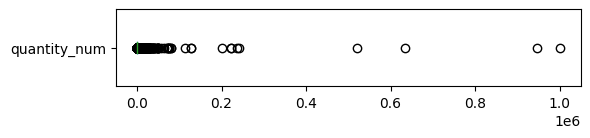

In [50]:
# Plotting boxplot of 'quantity_num'
data['quantity_num'].plot.box(vert=False);
plt.gcf().set_size_inches(6,1)

In [51]:
# Putting outliers to nan
data['quantity_num'] = data['quantity_num'].where(data['quantity_num'].between(0,10001))

In [52]:
# Preview
my_c = data.columns[data.columns.str.contains('serving')]
data[my_c][data[my_c].notna().any(axis=1)].sample(5)

,serving_size,serving_quantity
1801396,15 ml,15.0
1811124,75 g,75.0
1800310,serving,0.0
708294,NaN,57.0
596473,NaN,57.0


In [53]:
del data['serving_size']

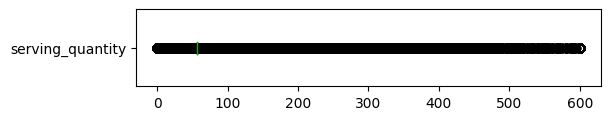

In [54]:
# Putting abnormal values to nan, checking distribution
data['serving_quantity'] = data['serving_quantity'].clip(0,600)
data['serving_quantity'].map({0:np.nan, 600:np.nan})
data['serving_quantity'].plot.box(vert=False);
plt.gcf().set_size_inches(6,1)

In [55]:
## Setting unknown to nan

data['quantity_unit'] = data['quantity_unit'].fillna('unknown')

In [56]:
data['quantity_unit'].unique()

array(['unknown', 'g', 'ml'], dtype=object)

Encoding quantity unit

In [57]:
# Add a feature hashed column based on the text_column
data = add_feature_hashed_column(data, 'quantity_unit', n_features=3)

### 2.3 Category columns

In [58]:
# How much of unknowned is missing in pnns1/unknown ?

print('cat of pnns2/unknown in pnns1:\n',
     data[data['pnns1']=='unknown']['pnns2'].value_counts())
print('cat of pnns1/unknown in pnns2: ',
      data[data['pnns2']=='unknown']['pnns1'].value_counts())


cat of pnns2/unknown in pnns1:
 pnns2
unknown    1116262
Name: count, dtype: int64
cat of pnns1/unknown in pnns2:  pnns1
unknown    1116262
Name: count, dtype: int64


### Beverages

In [59]:
data.pnns1.unique()


array(['unknown', 'fat and sauce', 'composite food',
       'fruit and vegetable', 'beverage', 'fish meat egg',
       'cereal and potato', 'salty snack', 'sugary snack',
       'milk and dairy product', 'alcoholic beverage'], dtype=object)

In [60]:
data.pnns2.unique()


array(['unknown', 'dressing and sauce', 'pizza pie and quiche', 'fruit',
       'one dish meal', 'sweetened beverage', 'meat', 'bread',
       'salty and fatty product', 'fruit juice', 'sweet', 'vegetable',
       'biscuit and cake', 'fat', 'dairy dessert', 'pastry',
       'dried fruit', 'legume', 'unsweetened beverage', 'nut', 'cereal',
       'alcoholic beverage', 'breakfast cereal', 'appetizer',
       'fish and seafood', 'processed meat', 'sandwich',
       'chocolate product', 'cheese', 'milk and yogurt',
       'plant based milk substitute', 'egg', 'ice cream',
       'tea and herbal tea and coffee', 'potato',
       'artificially sweetened beverage', 'soup',
       'water and flavored water', 'offal', 'fruit nectar'], dtype=object)

In [61]:
# Which categories of 'pnns2' are in 'pnns1'/'beverages' ?

data.groupby('pnns1').get_group('beverage')['pnns2'].unique()

array(['sweetened beverage', 'fruit juice', 'unsweetened beverage',
       'plant based milk substitute', 'tea and herbal tea and coffee',
       'artificially sweetened beverage', 'water and flavored water',
       'fruit nectar'], dtype=object)

In [62]:
# Index selection for nutriscore calculation

i_bev = data.groupby('pnns1').get_group('beverage').index # 57472
i_bev = i_bev.append(data.groupby('pnns2').get_group('alcoholic beverage').index)
# i_bev = i_bev.append(df[m1&m2].index)
#i_not_bev = pd.Index(set(data.index)-set(i_bev)-set(i_unkn))

In [63]:


# The subcategories of 'pnns1'/'beverages' are they all contained 
# in above-listed categories from pnns2 ? 

data[data['pnns2'].isin(['sweetened beverage', 'fruit juice', 'unsweetened beverage',
       'plant based milk substitute', 'tea and herbal tea and coffee',
       'artificially sweetened beverage', 'water and flavored water',
       'fruit nectar'])].shape, data[data['pnns1']=='beverage'].shape
# -> ((57472, 108), (57472, 108)) Yes, same shape



((67804, 160), (67804, 160))

#### Fruits 

In [64]:
data.groupby('pnns1').get_group('fruit and vegetable')['pnns2'].unique()

array(['fruit', 'vegetable', 'dried fruit', 'soup'], dtype=object)

In [65]:
# The subcategories of 'pnns1'/'fruits and vegetables' are they all contained 
# in above-listed categories from pnns2 ? 

data[data['pnns2'].isin(['fruit','vegetable','dried fruit','soup'])].shape,\
                                    data[data['pnns1']=='fruit and vegetable'].shape

((53770, 160), (53770, 160))

#### Fats

In [66]:
data.groupby('pnns1').get_group('fat and sauce')['pnns2'].unique()

array(['dressing and sauce', 'fat'], dtype=object)

### Encoding of the Data

In [67]:
from sklearn.feature_extraction import FeatureHasher

def hash_column(column, n_features=1000):
    """
    Hashes a Pandas DataFrame column using the FeatureHasher from scikit-learn.

    Parameters:
    -----------
    column : pandas.Series
        The column to hash.

    n_features : int, optional (default=1000)
        The number of output features.

    Returns:
    --------
    hashed_column : numpy.array
        The hashed column as a NumPy array.
    """
    # Convert the column to an iterable of iterables containing strings
    iterable_column = [[str(val)] for val in column]

    hasher = FeatureHasher(n_features=n_features, input_type='string')
    hashed_features = hasher.transform(iterable_column)
    hashed_column = hashed_features.toarray()
    return hashed_column



In [68]:
def add_hashed_column(df, column_name, n_features=1000):
    """
    Adds a hashed column to a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to modify.

    column_name : str
        The name of the column to hash.

    n_features : int, optional (default=1000)
        The number of output features.

    Returns:
    --------
    df : pandas.DataFrame
        The modified DataFrame with the hashed column added.
    """
    # Compute the hashed column
    hashed_column = hash_column(df[column_name], n_features=n_features)

    # Add the hashed column to the DataFrame
    hashed_column_name = column_name + '_hashed'
    df[hashed_column_name] = pd.Series(hashed_column.tolist(), index=df.index)

    return df


In [69]:
import pandas as pd

def add_feature_hashed_column(df, column_name, n_features=1000):
    """
    Adds a feature hashed column to a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to modify.

    column_name : str
        The name of the column to hash.

    n_features : int, optional (default=1000)
        The number of output features.

    Returns:
    --------
    df : pandas.DataFrame
        The modified DataFrame with the hashed column added.
    """
    # Compute the hashed column
    hashed_column = hash_column(df[column_name], n_features=n_features)

    # Add the hashed column to the DataFrame
    hashed_column_name = column_name + '_hashed'
    df[hashed_column_name] = pd.Series(hashed_column.tolist(), index=df.index)

    return df


In [70]:
hash_pnns1 = hash_column(data['pnns1'], n_features=11)
print(hash_pnns1.shape)
add_hashed_column(data, 'pnns1', n_features=11)
add_feature_hashed_column(data, 'pnns1', n_features=11)

(1833614, 11)


,code,url,product_name,abbreviated_product_name,generic_name,packaging,brands,categories,origins_en,manufacturing_places,...,inositol_100g,carnitine_100g,fruits-vegetables-rate_100g,quantity_type,quantity_num,quantity_unit,quantity_unit_0,quantity_unit_1,quantity_unit_2,pnns1_hashed
0,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,andrè,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,0.028,0.011,45,NaN,NaN,unknown,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,vitória crackers,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,0.028,0.011,45,NaN,NaN,unknown,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
2,000000000004128579,http://world-en.openfoodfacts.org/product/0000...,burger meat pollo,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,0.028,0.011,45,NaN,NaN,unknown,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,0.028,0.011,45,NaN,NaN,unknown,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,000000000006021,http://world-en.openfoodfacts.org/product/0000...,blueberry cobbler coffee,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,0.028,0.011,45,NaN,NaN,unknown,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833609,3292590606497,http://world-en.openfoodfacts.org/product/3292...,instant feerique,NaN,NaN,NaN,thiriet,"dessert , frozen food , frozen dessert",NaN,NaN,...,0.028,0.011,45,NaN,NaN,unknown,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1833610,35033264,http://world-en.openfoodfacts.org/product/3503...,doowap,NaN,NaN,NaN,harrys,"snack , sweet snack , viennoiseries , brioche",NaN,NaN,...,0.028,0.011,25,NaN,NaN,unknown,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1833611,39240958,http://world-en.openfoodfacts.org/product/3924...,doowap,NaN,NaN,NaN,harrys,"snack , sweet snack , viennoiseries , brioche",NaN,NaN,...,0.028,0.011,25,NaN,NaN,unknown,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1833612,72355671,http://world-en.openfoodfacts.org/product/7235...,almond butter,NaN,NaN,NaN,harrys,"plant based food and beverage , plant based fo...",NaN,NaN,...,0.028,0.011,45,NaN,NaN,unknown,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [71]:
def add_feature_hashed_column(df, column_name, n_features=1000):
    """
    Add a feature hashed column to a DataFrame based on a specified column.
    
    Args:
    df (pandas.DataFrame): The DataFrame to add the feature hashed column to.
    column_name (str): The name of the column to hash.
    n_features (int): The number of features to use for the hash. Default is 1000.
    
    Returns:
    pandas.DataFrame: The original DataFrame with a new column containing the feature hashed values.
    """
    # Create the hasher object
    hasher = FeatureHasher(n_features=n_features, input_type='string')
    
    # Hash the column
    hashed_column = hasher.transform(df[column_name].apply(lambda x: [x]))
    
    # Create a DataFrame from the hashed column
    hashed_df = pd.DataFrame(hashed_column.toarray())
    
    # Rename the columns of the hashed DataFrame
    hashed_df.columns = [column_name + '_' + str(i) for i in range(n_features)]
    
    # Concatenate the hashed DataFrame to the original DataFrame
    df = pd.concat([df, hashed_df], axis=1)
    
    # Return the DataFrame with the new hashed column
    return df


In [72]:
# Add a feature hashed column based on the text_column
data = add_feature_hashed_column(data, 'pnns1', n_features=10)

### 3.0 Text Treatment

#### Ingredients

In [73]:
data.filter (like = 'ingre')

,ingredients_text,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
...,...,...
1833609,creme glacée confiture de lait à la crème fraî...,50.0
1833610,NaN,0.0
1833611,NaN,0.0
1833612,NaN,0.0


In [74]:
data.rename(columns = {'ingredients_text': 'ingredients'}, inplace = True)
IngCol = data['ingredients']

In [75]:
print('% of Null values = ',data['ingredients'].isnull().sum()/len(data)*100 ,'%')

% of Null values =  61.60936816581898 %


In [76]:
head_ing = data[~data['ingredients'].isnull()]['ingredients'].head(10)

In [77]:
for el in head_ing:
    print(el)
    print()

beta alanine, creatine hcl, ancient peat & apple extract (as elevatp), l-leucine, l-isoleucine, l-valine, betaine anhydrous, arginine silicate inositol (as nitrosigine), cordyceps militaris (cordyceps), ganoderma lucidum (reishi), pleurotus eryngii (king trumpet), lentinula edodes (shitake), hericium erinaceus (lion's mane), and trametes veriscolor (turkey tail) (as peako2), phyllanthus emblica (fruit) extract (as capros), nattokinase (as nsk-sd40), 1000 fu (fibronolytic units) of enzyme activity, aframomum melegueta (seed) (6-paradol 12%) (as caloriburn gp), caffeine anhydrous, methyliberine (as dynamine 40%), theacrine (as teacrine 40%), citric acid, natural & artificial flavors, malic acid, soluble corn fiber, sucralose, acesulfame potassium, calcium silicate, silicon dioxide, fd&c blue lake #1

eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre   moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de m

#### Categories

In [78]:
data.filter (like = 'categories')

,categories
0,unknown
1,unknown
2,unknown
3,unknown
4,unknown
...,...
1833609,"dessert , frozen food , frozen dessert"
1833610,"snack , sweet snack , viennoiseries , brioche"
1833611,"snack , sweet snack , viennoiseries , brioche"
1833612,"plant based food and beverage , plant based fo..."


In [79]:
print('% of Null values = ',data['categories'].isnull().sum()/len(data)*100 ,'%')

head_ing = data[~data['categories'].isnull()]['categories'].head(10)

for el in head_ing:
    print(el)
    print()

% of Null values =  5.453710541040808e-05 %
unknown

unknown

unknown

unknown

unknown

unknown

condiment , sauce , mustard , grocery

unknown

unknown

unknown



In [80]:
# Text process
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import UnigramTagger,pos_tag
from nltk import bigrams, ngrams
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [81]:
data.select_dtypes(include=['object'])

,code,url,product_name,abbreviated_product_name,generic_name,packaging,brands,categories,origins_en,manufacturing_places,...,pnns1,pnns2,food_groups_en,brand_owner,ecoscore_grade,owner,main_category,quantity_type,quantity_unit,pnns1_hashed
0,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,andrè,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,unknown,unknown,unknown,NaN,unknown,NaN,unknown,NaN,unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,vitória crackers,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,unknown,unknown,unknown,NaN,unknown,NaN,unknown,NaN,unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
2,000000000004128579,http://world-en.openfoodfacts.org/product/0000...,burger meat pollo,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,unknown,unknown,unknown,NaN,unknown,NaN,unknown,NaN,unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,unknown,unknown,unknown,NaN,unknown,NaN,unknown,NaN,unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,000000000006021,http://world-en.openfoodfacts.org/product/0000...,blueberry cobbler coffee,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,unknown,unknown,unknown,NaN,unknown,NaN,unknown,NaN,unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833609,3292590606497,http://world-en.openfoodfacts.org/product/3292...,instant feerique,NaN,NaN,NaN,thiriet,"dessert , frozen food , frozen dessert",NaN,NaN,...,unknown,unknown,unknown,NaN,unknown,NaN,frozen dessert,NaN,unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1833610,35033264,http://world-en.openfoodfacts.org/product/3503...,doowap,NaN,NaN,NaN,harrys,"snack , sweet snack , viennoiseries , brioche",NaN,NaN,...,sugary snack,pastry,"sugary snack , pastry",NaN,c,org-barilla,brioche,NaN,unknown,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1833611,39240958,http://world-en.openfoodfacts.org/product/3924...,doowap,NaN,NaN,NaN,harrys,"snack , sweet snack , viennoiseries , brioche",NaN,NaN,...,sugary snack,pastry,"sugary snack , pastry",NaN,c,org-barilla,brioche,NaN,unknown,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1833612,72355671,http://world-en.openfoodfacts.org/product/7235...,almond butter,NaN,NaN,NaN,harrys,"plant based food and beverage , plant based fo...",NaN,NaN,...,unknown,unknown,unknown,NaN,unknown,org-barilla,almond butter,NaN,unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [82]:
CatValList = data['categories']
CatValList

0                                                    unknown
1                                                    unknown
2                                                    unknown
3                                                    unknown
4                                                    unknown
                                 ...                        
1833609               dessert , frozen food , frozen dessert
1833610        snack , sweet snack , viennoiseries , brioche
1833611        snack , sweet snack , viennoiseries , brioche
1833612    plant based food and beverage , plant based fo...
1833613    snack , salty snack , appetizer , chip and fry...
Name: categories, Length: 1833614, dtype: object

In [83]:
stop_words = set(stopwords.words('german'))
stop_words = set(stopwords.words('french'))
stop_words = set(stopwords.words('portuguese'))
stop_words = set(stopwords.words('spanish'))
stop_Words = set(stopwords.words('english'))

def filter_stopwords( sentence ): 
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

data['categories'].apply( filter_stopwords )



stopWords = set(stopwords.words('english'))
text = ' '.join(CatValList).lower()
text=text.replace('fr:','')
text=text.replace('en:','')
wordsFiltered = []

lemmatizer = WordNetLemmatizer()

res=word_tokenize(text)

for w in text:
    if w not in stopWords:
        wordsFiltered.append(w)
        
res=[lemmatizer.lemmatize(word) for word in res]

res=' '.join(res).lower()

wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=False).generate(wordsFiltered)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()



Hash encoding

### Nutrigrade

In [84]:
from sklearn import preprocessing

In [85]:
le = preprocessing.LabelEncoder()

In [86]:
data['nutrigrade'] = le.fit_transform(data['nutrigrade'])

## Build dataset

In [87]:
data.select_dtypes(include=['object']).columns

Index(['code', 'url', 'product_name', 'abbreviated_product_name',
       'generic_name', 'packaging', 'brands', 'categories', 'origins_en',
       'manufacturing_places', 'labels', 'emb_codes',
       'first_packaging_code_geo', 'purchase_places', 'stores', 'countries',
       'ingredients', 'allergens', 'traces', 'no_nutrition_data', 'additives',
       'pnns1', 'pnns2', 'food_groups_en', 'brand_owner', 'ecoscore_grade',
       'owner', 'main_category', 'quantity_type', 'quantity_unit',
       'pnns1_hashed'],
      dtype='object')

In [88]:
data.drop(columns = ['url', 'abbreviated_product_name',
       'generic_name', 'packaging', 'brands', 'categories', 'origins_en',
       'manufacturing_places', 'labels', 'emb_codes',
       'first_packaging_code_geo', 'purchase_places', 'stores', 'countries',
       'ingredients', 'allergens', 'traces', 'no_nutrition_data', 'additives',
       'pnns2', 'food_groups_en', 'brand_owner', 'ecoscore_grade',
       'owner', 'main_category', 'quantity_type', 'quantity_unit',
       'pnns1_hashed'], inplace=True)

In [89]:
data

,code,product_name,serving_quantity,additives_n,nutriscore,nutrigrade,nova_group,pnns1,ecoscore_score,product_quantity,...,pnns1_0,pnns1_1,pnns1_2,pnns1_3,pnns1_4,pnns1_5,pnns1_6,pnns1_7,pnns1_8,pnns1_9
0,0000000000000207025004,andrè,57.0,1.0,10.0,2,4.0,unknown,71.0,250.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000000000017,vitória crackers,57.0,1.0,10.0,2,4.0,unknown,71.0,250.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000000000004128579,burger meat pollo,57.0,1.0,10.0,2,4.0,unknown,71.0,250.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000000000004622327,hamburguesas de ternera 100%,57.0,1.0,10.0,2,4.0,unknown,71.0,250.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000000000006021,blueberry cobbler coffee,57.0,1.0,10.0,2,4.0,unknown,71.0,250.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833609,3292590606497,instant feerique,0.0,15.0,14.0,3,4.0,unknown,71.0,250.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1833610,35033264,doowap,50.0,2.0,13.0,3,4.0,sugary snack,44.0,400.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1833611,39240958,doowap,50.0,2.0,13.0,3,4.0,sugary snack,44.0,400.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1833612,72355671,almond butter,57.0,1.0,13.0,3,4.0,unknown,71.0,250.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
data.to_csv('../data/df_CatVal_cleaned.csv')  


In [91]:
data.shape

(1833614, 143)